In [3]:
!pip install ultralytics
from ultralytics import YOLO


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="IEOtnnS8di9flBkTkxxo")
project = rf.workspace("koteitan").project("book-spine-detection-2cci9")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:

# Entraîner le modèle
model = YOLO("yolov8n.pt")
results = model.train(data="/content/book-spine-detection-1/data.yaml", epochs=20)#attention sur le chemin


Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/book-spine-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1812.9±548.3 MB/s, size: 62.8 KB)


train: Scanning /content/book-spine-detection-1/train/labels... 2717 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2717/2717 [00:02<00:00, 1294.55it/s]

train: /content/book-spine-detection-1/train/images/20240221_103249_jpg.rf.25be47dec48ae4b29357084ceeda9ec3.jpg: 1 duplicate labels removed
train: /content/book-spine-detection-1/train/images/IMG_1401_jpg.rf.3ca0aa058dacdebd36f15e63749e5403.jpg: 1 duplicate labels removed
train: /content/book-spine-detection-1/train/images/IMG_2967_jpg.rf.68c9a39cb33cbd144dc2c4ad4539492c.jpg: 1 duplicate labels removed


train: New cache created: /content/book-spine-detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 46000, len(boxes) = 46102. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 982.5±587.1 MB/s, size: 75.3 KB)


val: Scanning /content/book-spine-detection-1/valid/labels... 782 images, 0 backgrounds, 0 corrupt: 100%|██████████| 782/782 [00:01<00:00, 531.61it/s]

val: /content/book-spine-detection-1/valid/images/20240221_103329_jpg.rf.baaa09c472b1945ee3452ca8dbbd642f.jpg: 1 duplicate labels removed
val: New cache created: /content/book-spine-detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13266, len(boxes) = 13290. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.82G      1.689      1.494      1.485        343        640: 100%|██████████| 170/170 [00:58<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]


                   all        782      13290      0.725      0.682      0.707       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.96G      1.384      1.062      1.279        457        640: 100%|██████████| 170/170 [00:49<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.49it/s]


                   all        782      13290      0.751      0.697       0.75      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.99G      1.321      1.002      1.242        390        640: 100%|██████████| 170/170 [00:50<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.10it/s]


                   all        782      13290      0.827      0.794      0.871      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.31G      1.264     0.9535      1.204        355        640: 100%|██████████| 170/170 [00:46<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.09it/s]


                   all        782      13290      0.844      0.794      0.881      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.65G      1.184     0.8733      1.164        341        640: 100%|██████████| 170/170 [00:47<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]


                   all        782      13290      0.849      0.815      0.891      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.67G      1.174     0.8485      1.144        463        640: 100%|██████████| 170/170 [00:48<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.53it/s]


                   all        782      13290      0.864      0.832      0.908      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.68G      1.135     0.8118      1.136        402        640: 100%|██████████| 170/170 [00:48<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.09it/s]


                   all        782      13290      0.884      0.833      0.911      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       5.7G      1.082     0.7759      1.108        298        640: 100%|██████████| 170/170 [00:47<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.80it/s]


                   all        782      13290      0.908      0.881      0.942      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.71G      1.031     0.7398      1.086        354        640: 100%|██████████| 170/170 [00:48<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


                   all        782      13290      0.877      0.866      0.913      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.73G      1.027      0.726      1.081        416        640: 100%|██████████| 170/170 [00:47<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


                   all        782      13290      0.905      0.888      0.943      0.707
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.75G     0.9835     0.6909      1.055        266        640: 100%|██████████| 170/170 [00:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]


                   all        782      13290      0.922      0.885      0.948      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.77G     0.9445      0.651      1.038        244        640: 100%|██████████| 170/170 [00:45<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]


                   all        782      13290      0.931      0.902      0.954      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.79G     0.9083     0.6253      1.019        202        640: 100%|██████████| 170/170 [00:46<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


                   all        782      13290       0.94        0.9      0.955      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       5.8G     0.8668     0.6003      1.003        290        640: 100%|██████████| 170/170 [00:47<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]

                   all        782      13290      0.941       0.91      0.961      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.82G     0.8282     0.5754     0.9858        177        640: 100%|██████████| 170/170 [00:46<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]


                   all        782      13290      0.939      0.923      0.964      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.84G     0.8073     0.5574      0.976        226        640: 100%|██████████| 170/170 [00:46<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.31it/s]

                   all        782      13290      0.946      0.923      0.966      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.85G      0.793     0.5491     0.9692        235        640: 100%|██████████| 170/170 [00:45<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]


                   all        782      13290      0.949      0.923      0.964      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.87G     0.7641     0.5314     0.9585        225        640: 100%|██████████| 170/170 [00:45<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]


                   all        782      13290      0.948      0.926      0.966      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.89G     0.7452     0.5177     0.9489        191        640: 100%|██████████| 170/170 [00:44<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.77it/s]


                   all        782      13290      0.951      0.924      0.967      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       5.9G     0.7224     0.5043     0.9421        224        640: 100%|██████████| 170/170 [00:45<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


                   all        782      13290      0.954      0.927      0.969      0.814

20 epochs completed in 0.311 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]


                   all        782      13290      0.954      0.927      0.969      0.814
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content/runs/detect/train2/weights

best.pt  last.pt


Voila ce qu'il y a dans results(i):

| Attribut    | Type            | Description                                                  |
| ----------- | --------------- | ------------------------------------------------------------ |
| `.path`     | `str`           | Chemin de l'image prédite                                    |
| `.boxes`    | `Boxes`         | Toutes les boîtes détectées (coordonnées, classes, scores)   |
| `.orig_img` | `np.ndarray`    | Image originale (array OpenCV)                               |
| `.plot()`   | méthode         | Retourne l’image avec les boîtes dessinées                   |
| `.names`    | `dict`          | Dictionnaire id → nom de classe                              |
| `.probs`    | `None` ou array | Probabilités (pour les modèles de classification uniquement) |



image 1/1 /content/drive/MyDrive/Colab Notebooks/ScanLib/biblio3.png: 640x480 9 0s, 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


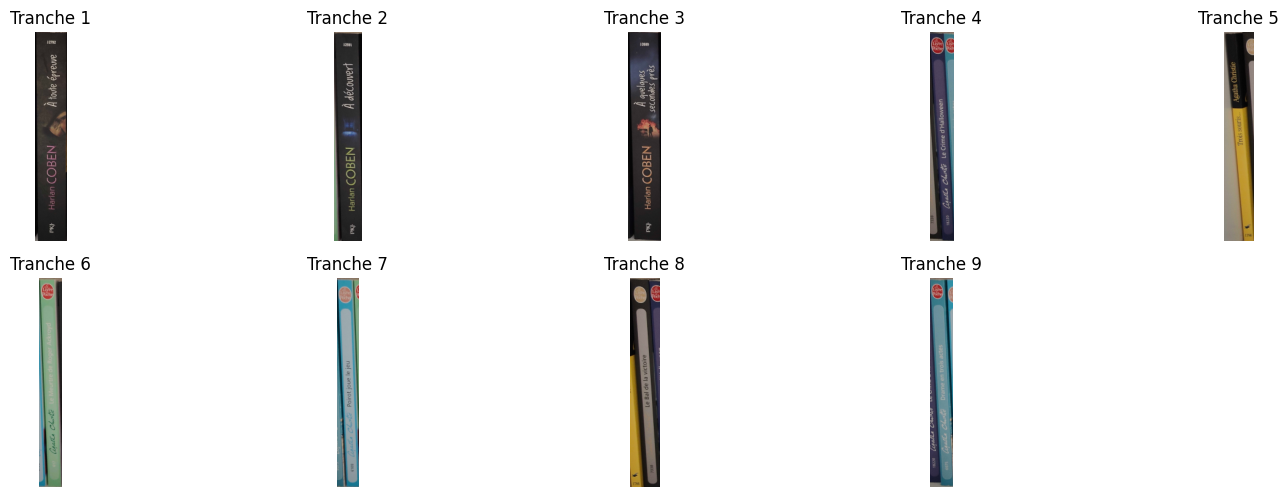

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Recharger l'image originale
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio3.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

model = YOLO("/content/drive/MyDrive/Colab Notebooks/ScanLib/modèle/best.pt")
results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio3.png", save=True, conf=0.25)

# Extraire les boîtes depuis results
boxes = results[0].boxes

# Afficher les tranches détectées
plt.figure(figsize=(15, 10))

for i, box in enumerate(boxes):
    xyxy = box.xyxy[0].cpu().numpy().astype(int)  # x1, y1, x2, y2
    x1, y1, x2, y2 = xyxy
    crop = image[y1:y2, x1:x2]

    # Afficher la tranche
    plt.subplot(4, 5, i + 1)  # Ajuste en fonction du nombre total
    plt.imshow(crop)
    plt.axis("off")
    plt.title(f"Tranche {i+1}")

plt.tight_layout()
plt.show()

Enregistrer le modèle sur drive.

In [ ]:
import shutil

# Copier vers ton Drive (ex : dans "Mon Drive")
shutil.copy("/content/runs/detect/train2/weights/best.pt",
            "/content/drive/MyDrive/Colab Notebooks/ScanLib/modèle/best.pt")


'/content/drive/MyDrive/Colab Notebooks/ScanLib/modèle/best.pt'